# US Presidents Speech Analysis

## Creation of corpus containing all presidential speeches

In [1]:
# Import NLTK libraries
import nltk
from nltk.corpus import inaugural, stopwords
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rraja\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rraja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rraja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rraja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import libraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

This NLTK's inaugural corpus contains the speeches of all the presidents including president Joe Biden

In [4]:
# Got these political parties details from the Miller Center website
Other = ['Washington', 'Adams', 'Jefferson', 'Madison', 'Monroe', 'Adams', 'Harrison', 'Taylor']
Democrat = ['Jackson', 'VanBuren', 'Polk', 'Pierce', 'Buchanan', 'Cleveland', 'Wilson', 'Truman', 'Kennedy', 'Johnson', 'Carter', 'Clinton', 'Obama', 'Biden']
Republican = ['Lincoln', 'Grant', 'Hayes', 'Garfield', 'Harrison', 'Taft', 'Hoover', 'Coolidge', 'Harding', 'McKinley', 'Roosevelt', 'Eisenhower', 'Nixon', 'Reagan', 'Bush', 'Trump']

In [5]:
years = []
speeches = []
names = []
parties = []
for fileid in inaugural.fileids():
    year = fileid.split("-")[0]
    speech = inaugural.raw(fileid)
    name = fileid.split("-")[1].split(".")[0]
    if name in Other:
        party = "Other"
    elif name in Democrat:
        party = "Democrat"
    else:
        party = "Republican"
    years.append(year)
    speeches.append(speech)
    names.append(name)
    parties.append(party)

In [6]:
corpus = pd.DataFrame(data=zip(years, names, parties, speeches), columns = ["Year", "President_Name", "Political_Party", "Raw_Speech"])

In [7]:
corpus.head()

,Year,President_Name,Political_Party,Raw_Speech
0,1789,Washington,Other,Fellow-Citizens of the Senate and of the House...
1,1793,Washington,Other,"Fellow citizens, I am again called upon by the..."
2,1797,Adams,Other,"When it was first perceived, in early times, t..."
3,1801,Jefferson,Other,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805,Jefferson,Other,"Proceeding, fellow citizens, to that qualifica..."


In [8]:
corpus

,Year,President_Name,Political_Party,Raw_Speech
0,1789,Washington,Other,Fellow-Citizens of the Senate and of the House...
1,1793,Washington,Other,"Fellow citizens, I am again called upon by the..."
2,1797,Adams,Other,"When it was first perceived, in early times, t..."
3,1801,Jefferson,Other,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805,Jefferson,Other,"Proceeding, fellow citizens, to that qualifica..."
5,1809,Madison,Other,Unwilling to depart from examples of the most ...
6,1813,Madison,Other,About to add the solemnity of an oath to the o...
7,1817,Monroe,Other,I should be destitute of feeling if I was not ...
8,1821,Monroe,Other,"Fellow citizens, I shall not attempt to descri..."
9,1825,Adams,Other,In compliance with an usage coeval with the ex...


In [9]:
# since there the last names of two presidents named Bush. we are renaming one bush to HW Bush
corpus.loc[50]["President_Name"] = "HW Bush"

In [10]:
def preprocess_speech(text):
    '''
    Function to lower the speech text, remove punctuations and stop words from the speech and perform lemmatization.
    Args: 
        text (str): raw speech text.
    Returns:
        preprocessed speech text.
    '''
    lem=WordNetLemmatizer()
    lower_text = text.lower()
    tokens = nltk.word_tokenize(lower_text)
    punct_removed = [token for token in tokens if token.isalnum()] # remove punctuations from speech
    
    stopwords_removed = [word for word in punct_removed if word not in stopwords.words("english")]
    
    final_words=[lem.lemmatize(w) for w in stopwords_removed if len(w) > 2]
    
    return " ".join(final_words)

In [11]:
corpus["Preprocessed_Speech"] = corpus["Raw_Speech"].apply(preprocess_speech)

In [17]:
corpus.head()

,Year,President_Name,Political_Party,Raw_Speech,Preprocessed_Speech
0,1789,Washington,Other,Fellow-Citizens of the Senate and of the House...,senate house representative among vicissitude ...
1,1793,Washington,Other,"Fellow citizens, I am again called upon by the...",fellow citizen called upon voice country execu...
2,1797,Adams,Other,"When it was first perceived, in early times, t...",first perceived early time middle course ameri...
3,1801,Jefferson,Other,Friends and Fellow Citizens:\n\nCalled upon to...,friend fellow citizen called upon undertake du...
4,1805,Jefferson,Other,"Proceeding, fellow citizens, to that qualifica...",proceeding fellow citizen qualification consti...


In [18]:
corpus.to_excel("us_presidents_preprocessed_speech.xlsx", header=True, index=True)

Since some presidents have served more than one term, they would have multiple inaugural speeches. Here, we are appending those speeches in a single row for each president.

In [19]:
grouped_corpus = corpus.groupby(['President_Name','Political_Party'])['Preprocessed_Speech'].apply(' '.join).reset_index()

In [20]:
grouped_corpus

,President_Name,Political_Party,Preprocessed_Speech
0,Adams,Other,first perceived early time middle course ameri...
1,Biden,Democrat,chief justice robert vice president harris spe...
2,Buchanan,Democrat,fellow citizen appear day take solemn oath fai...
3,Bush,Republican,president clinton distinguished guest fellow c...
4,Carter,Democrat,nation want thank predecessor done heal land o...
5,Cleveland,Democrat,fellow citizen presence vast assemblage countr...
6,Clinton,Democrat,fellow citizen today celebrate mystery america...
7,Coolidge,Republican,countryman one contemplate current condition w...
8,Eisenhower,Republican,friend begin expression thought deem appropria...
9,Garfield,Republican,stand upon eminence overlook hundred year nati...


### Let us examine which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary?

In [21]:
def process_vocabulary(text):
    '''
    function to process the vocabulary for the given text.
    
    Args:
        text (str): preprocessed president speech.
    Returns:
        int: total no of distinct words present in the given text.
    '''
    vectorizer = CountVectorizer()
    vectorizer.fit_transform([text])
    
    return len(vectorizer.vocabulary_)

In [22]:
grouped_corpus["vocabulary_count"] = grouped_corpus["Preprocessed_Speech"].apply(process_vocabulary)

In [23]:
grouped_corpus.sort_values("vocabulary_count", ascending=False)

,President_Name,Political_Party,Preprocessed_Speech,vocabulary_count
13,Harrison,Other,called retirement supposed continue residue li...,2206
23,Monroe,Other,destitute feeling deeply affected strong proof...,1458
22,McKinley,Republican,fellow citizen obedience people presence autho...,1405
29,Roosevelt,Republican,fellow citizen people earth cause thankful sai...,1376
0,Adams,Other,first perceived early time middle course ameri...,1232
30,Taft,Republican,fellow citizen anyone taken oath taken must fe...,1174
28,Reagan,Republican,senator hatfield chief justice president vice ...,1157
25,Obama,Democrat,fellow citizen stand today humbled task gratef...,1117
27,Polk,Democrat,fellow citizen without solicitation part chose...,1087
34,VanBuren,Democrat,fellow citizen practice predecessor imposes ob...,1080


From the above dataframe, we can conclude that the President Harrison has given an inaugural speech with 
most vocabulary of 2206 words. 

Also, the president Carter has given an inaugural speech with least vocabulary of just 392 words.

NOTE: These words doesn't include stop words like are, the, at etc.


In [24]:
# total words spoken by presidents of each political party
grouped_corpus.groupby(['Political_Party'])['vocabulary_count'].apply(sum).reset_index()

,Political_Party,vocabulary_count
0,Democrat,10836
1,Other,7583
2,Republican,14807


In [25]:
# Average no of words spoken by presidents of each political party
grouped_corpus.groupby(['Political_Party'])['vocabulary_count'].mean().reset_index()

,Political_Party,vocabulary_count
0,Democrat,774.000000
1,Other,1083.285714
2,Republican,925.437500


From this, we can conclude that the presidents from political parties other than Democratic and Republican have given 
speeches with most vocabularies on average.


### Visualize presidential vocabulary from the earliest president (Washington) to the latest (Trump) in chronological order. Coloring the barplot as blue for Democrat, red for Republican, and gray for Others.

In [26]:
grouped_corpus

,President_Name,Political_Party,Preprocessed_Speech,vocabulary_count
0,Adams,Other,first perceived early time middle course ameri...,1232
1,Biden,Democrat,chief justice robert vice president harris spe...,612
2,Buchanan,Democrat,fellow citizen appear day take solemn oath fai...,760
3,Bush,Republican,president clinton distinguished guest fellow c...,877
4,Carter,Democrat,nation want thank predecessor done heal land o...,392
5,Cleveland,Democrat,fellow citizen presence vast assemblage countr...,1006
6,Clinton,Democrat,fellow citizen today celebrate mystery america...,897
7,Coolidge,Republican,countryman one contemplate current condition w...,1000
8,Eisenhower,Republican,friend begin expression thought deem appropria...,1007
9,Garfield,Republican,stand upon eminence overlook hundred year nati...,827


In [27]:
# get president names in chronological order
order = list(corpus['President_Name'].values)

In [28]:
order

['Washington',
 'Washington',
 'Adams',
 'Jefferson',
 'Jefferson',
 'Madison',
 'Madison',
 'Monroe',
 'Monroe',
 'Adams',
 'Jackson',
 'Jackson',
 'VanBuren',
 'Harrison',
 'Polk',
 'Taylor',
 'Pierce',
 'Buchanan',
 'Lincoln',
 'Lincoln',
 'Grant',
 'Grant',
 'Hayes',
 'Garfield',
 'Cleveland',
 'Harrison',
 'Cleveland',
 'McKinley',
 'McKinley',
 'Roosevelt',
 'Taft',
 'Wilson',
 'Wilson',
 'Harding',
 'Coolidge',
 'Hoover',
 'Roosevelt',
 'Roosevelt',
 'Roosevelt',
 'Roosevelt',
 'Truman',
 'Eisenhower',
 'Eisenhower',
 'Kennedy',
 'Johnson',
 'Nixon',
 'Nixon',
 'Carter',
 'Reagan',
 'Reagan',
 'HW Bush',
 'Clinton',
 'Clinton',
 'Bush',
 'Bush',
 'Obama',
 'Obama',
 'Trump',
 'Biden']

In [29]:
# remove duplicate president names
order = list(dict.fromkeys(order))

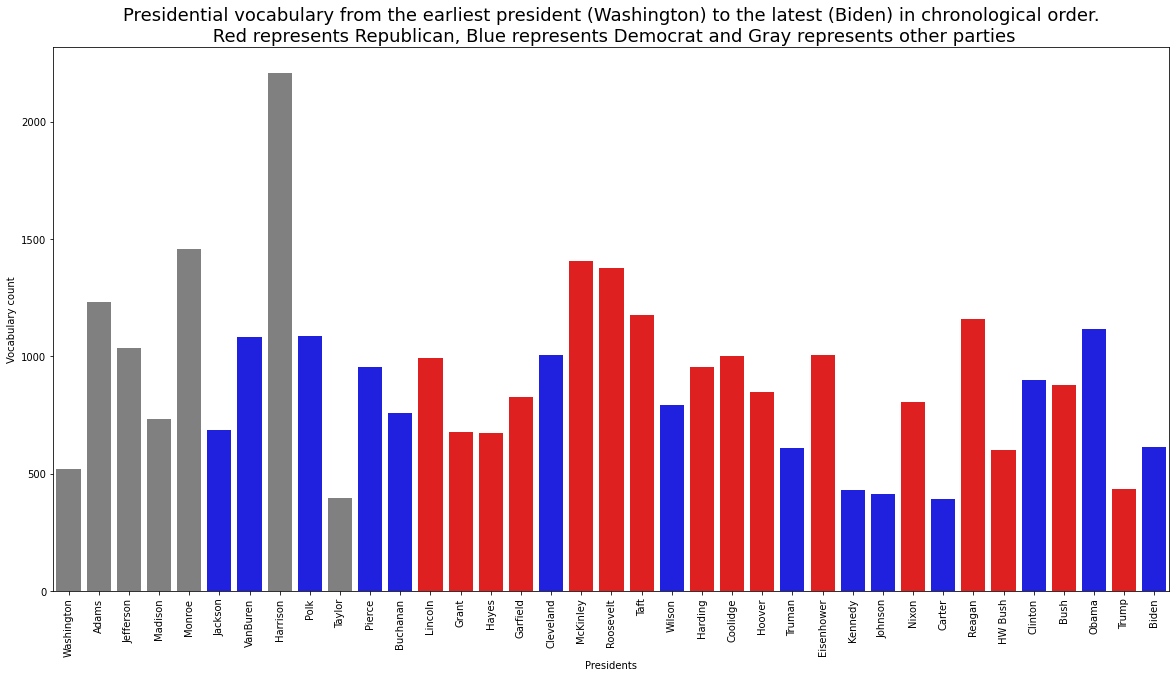

In [30]:
fig = plt.figure(figsize = (20, 10))

clrs = ['gray' if x in Other else 'blue' if x in Democrat else 'red' for x in order]

sns.barplot(x="President_Name", y="vocabulary_count", data=grouped_corpus, order=order, palette=clrs)
plt.xticks(rotation=90)
plt.rc('font', size=10)
plt.rc('axes', titlesize=18)
plt.xlabel("Presidents")
plt.ylabel("Vocabulary count")
plt.title("Presidential vocabulary from the earliest president (Washington) to the latest (Biden) in chronological order.\n Red represents Republican, Blue represents Democrat and Gray represents other parties")
plt.show()

### Let us look into top five most frequently used words (exclusive of stop words) used by each president? What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents? 

In [31]:
grouped_corpus

,President_Name,Political_Party,Preprocessed_Speech,vocabulary_count
0,Adams,Other,first perceived early time middle course ameri...,1232
1,Biden,Democrat,chief justice robert vice president harris spe...,612
2,Buchanan,Democrat,fellow citizen appear day take solemn oath fai...,760
3,Bush,Republican,president clinton distinguished guest fellow c...,877
4,Carter,Democrat,nation want thank predecessor done heal land o...,392
5,Cleveland,Democrat,fellow citizen presence vast assemblage countr...,1006
6,Clinton,Democrat,fellow citizen today celebrate mystery america...,897
7,Coolidge,Republican,countryman one contemplate current condition w...,1000
8,Eisenhower,Republican,friend begin expression thought deem appropria...,1007
9,Garfield,Republican,stand upon eminence overlook hundred year nati...,827


In [32]:
def find_frequent_words(text):
    '''
    function to find top 5 frequent words spoken by the presidents
    Args: 
        text (str): speech text.
    Returns:
        most_frequent (list): list of top 5 frequent words
    '''
    
    words = text.split()
    freqdist = nltk.FreqDist(words)
    most_frequent = [word for word, count in freqdist.most_common(5)]
    
    return most_frequent

In [33]:
grouped_corpus['most_frequent_words'] = grouped_corpus['Preprocessed_Speech'].apply(find_frequent_words)

In [34]:
grouped_corpus

,President_Name,Political_Party,Preprocessed_Speech,vocabulary_count,most_frequent_words
0,Adams,Other,first perceived early time middle course ameri...,1232,"[government, nation, people, union, upon]"
1,Biden,Democrat,chief justice robert vice president harris spe...,612,"[america, american, one, nation, day]"
2,Buchanan,Democrat,fellow citizen appear day take solemn oath fai...,760,"[state, shall, constitution, may, people]"
3,Bush,Republican,president clinton distinguished guest fellow c...,877,"[freedom, nation, america, american, citizen]"
4,Carter,Democrat,nation want thank predecessor done heal land o...,392,"[nation, new, must, strength, people]"
5,Cleveland,Democrat,fellow citizen presence vast assemblage countr...,1006,"[people, government, public, citizen, shall]"
6,Clinton,Democrat,fellow citizen today celebrate mystery america...,897,"[new, world, america, american, must]"
7,Coolidge,Republican,countryman one contemplate current condition w...,1000,"[country, must, nation, great, government]"
8,Eisenhower,Republican,friend begin expression thought deem appropria...,1007,"[people, world, nation, free, peace]"
9,Garfield,Republican,stand upon eminence overlook hundred year nati...,827,"[people, government, constitution, state, law]"


In [35]:
# Join the speech texts grouped by political parties
speech_grouped_by_party = grouped_corpus.groupby(['Political_Party'])['Preprocessed_Speech'].apply(' '.join).reset_index()

In [36]:
speech_grouped_by_party

,Political_Party,Preprocessed_Speech
0,Democrat,chief justice robert vice president harris spe...
1,Other,first perceived early time middle course ameri...
2,Republican,president clinton distinguished guest fellow c...


In [37]:
speech_grouped_by_party['most_frequent_words'] = speech_grouped_by_party['Preprocessed_Speech'].apply(find_frequent_words)

In [38]:
speech_grouped_by_party

,Political_Party,Preprocessed_Speech,most_frequent_words
0,Democrat,chief justice robert vice president harris spe...,"[people, government, nation, must, state]"
1,Other,first perceived early time middle course ameri...,"[state, government, people, power, may]"
2,Republican,president clinton distinguished guest fellow c...,"[people, government, nation, must, world]"


Wow!. It is quite strange and surprising that the most frequent words from the inaugural speeches of all the presidents from both Democratic and Republican parties are quite the same.

The presidents from these parties have used people, government, must and nation most number of times.


### Let us explore key themes (e.g., freedom, liberty, country, etc.) used by each president in their inaugural speech? (3 points)

Let me try to get the theme of the speech text by using wordcloud

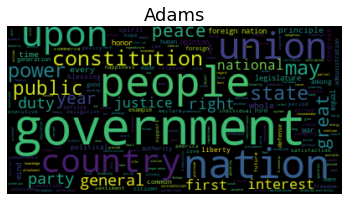

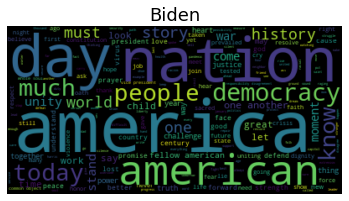

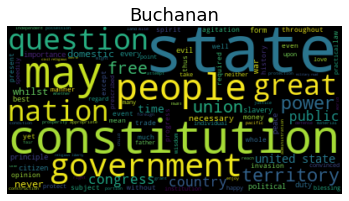

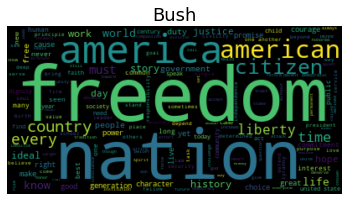

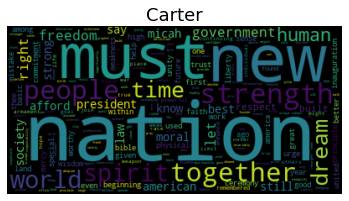

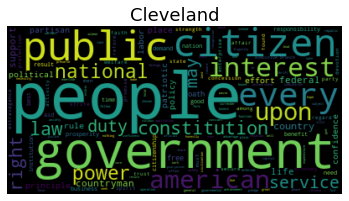

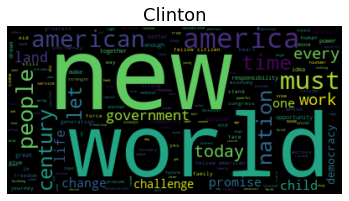

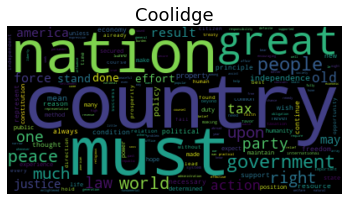

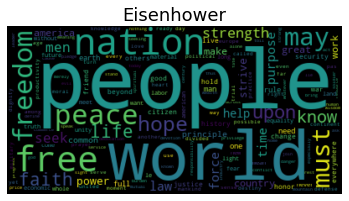

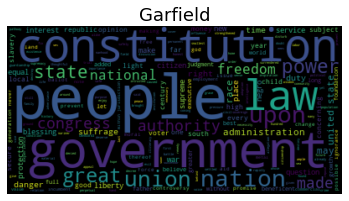

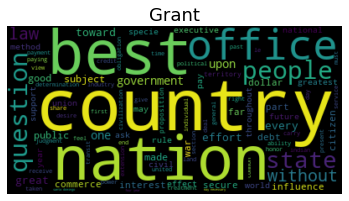

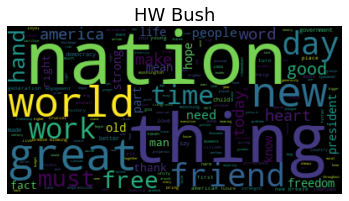

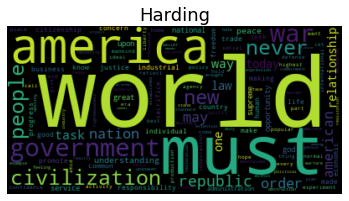

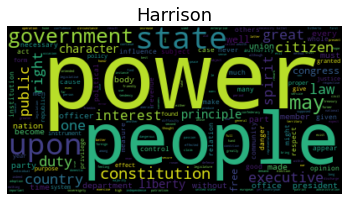

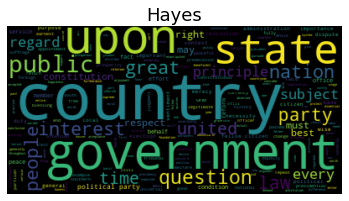

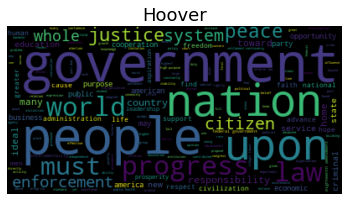

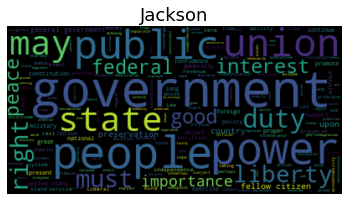

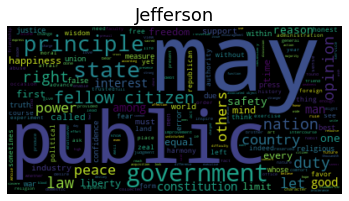

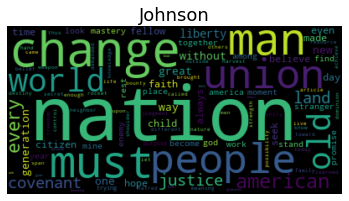

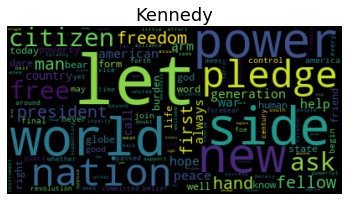

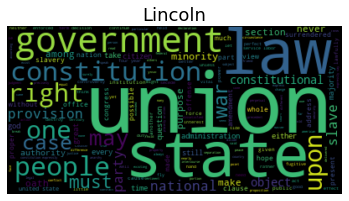

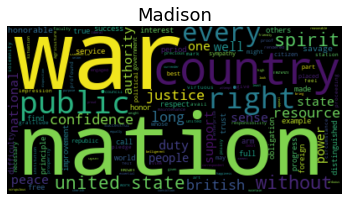

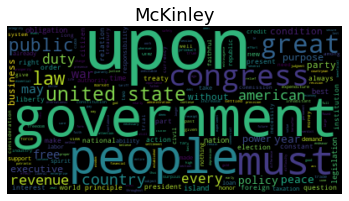

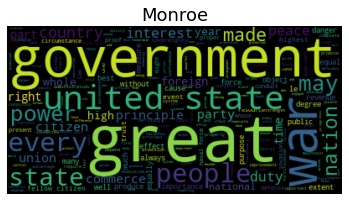

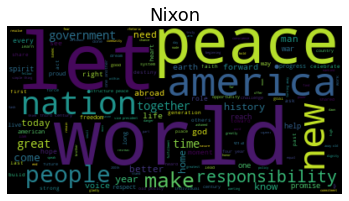

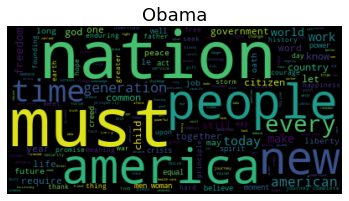

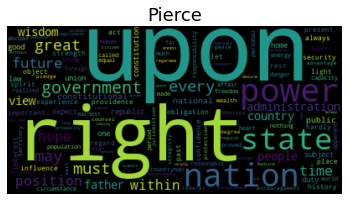

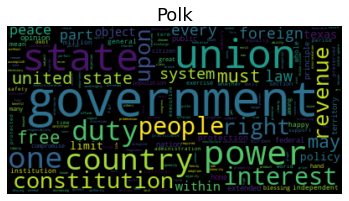

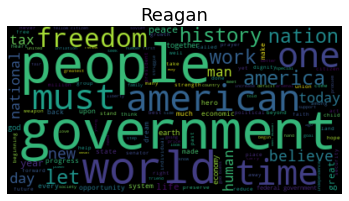

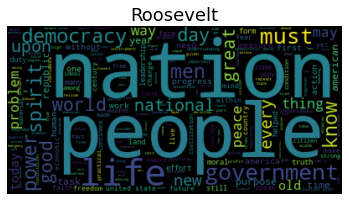

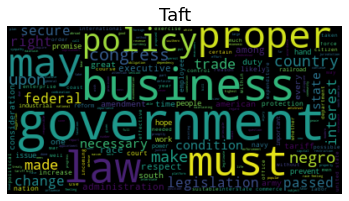

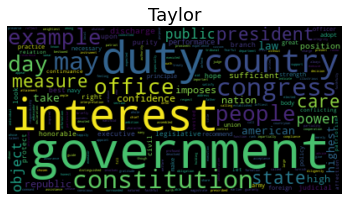

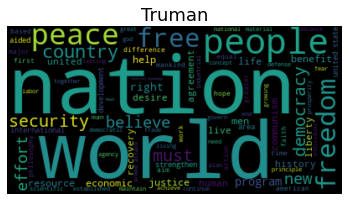

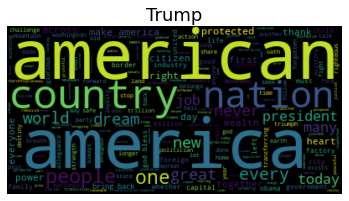

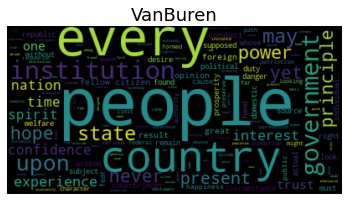

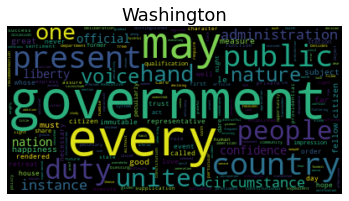

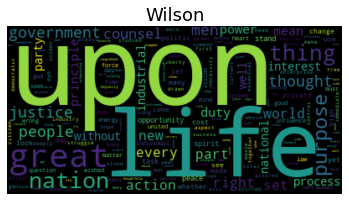

In [39]:
# Generate a word cloud image for all presidents
for i in range(len(grouped_corpus)):
    wordcloud = WordCloud().generate(grouped_corpus['Preprocessed_Speech'][i])
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(grouped_corpus["President_Name"][i])
    plt.show()

In [40]:
# themes extracted for each presidents from their word clouds
themes = ["government", "nation", "constitution", "nation", "nation", "people", "people", "nation", "peace", "constitution", "nation", "nation", "nation", "power", "government", "government", "power", "government", "people", "power", "constitution", "nation", "government", "government", "peace", "nation", "power", "power", "government", "nation", "government", "government", "peace", "nation", "people", "government", "nation"]

In [41]:
grouped_corpus["theme"] = themes

In [42]:
grouped_corpus

,President_Name,Political_Party,Preprocessed_Speech,vocabulary_count,most_frequent_words,theme
0,Adams,Other,first perceived early time middle course ameri...,1232,"[government, nation, people, union, upon]",government
1,Biden,Democrat,chief justice robert vice president harris spe...,612,"[america, american, one, nation, day]",nation
2,Buchanan,Democrat,fellow citizen appear day take solemn oath fai...,760,"[state, shall, constitution, may, people]",constitution
3,Bush,Republican,president clinton distinguished guest fellow c...,877,"[freedom, nation, america, american, citizen]",nation
4,Carter,Democrat,nation want thank predecessor done heal land o...,392,"[nation, new, must, strength, people]",nation
5,Cleveland,Democrat,fellow citizen presence vast assemblage countr...,1006,"[people, government, public, citizen, shall]",people
6,Clinton,Democrat,fellow citizen today celebrate mystery america...,897,"[new, world, america, american, must]",people
7,Coolidge,Republican,countryman one contemplate current condition w...,1000,"[country, must, nation, great, government]",nation
8,Eisenhower,Republican,friend begin expression thought deem appropria...,1007,"[people, world, nation, free, peace]",peace
9,Garfield,Republican,stand upon eminence overlook hundred year nati...,827,"[people, government, constitution, state, law]",constitution


I have assigned the themes for each of the president's based on their word clouds in their speeches.

This wordcloud is considering only the most frequent words. In general, most frequent words defines the theme of the overall text. 
But there are cases where the most frequent words alone would not be helpful in finding the theme of the text. In these cases, Topic Modelling comes into picture. Let us try the most popular topic modeling technique which is Latent Dirichlet Allocation, LDA in short.

In [43]:
from gensim import corpora, models

In [44]:
list_of_list_of_tokens = [grouped_corpus['Preprocessed_Speech'][i].split() for i in range(len(grouped_corpus["Preprocessed_Speech"]))]

In [45]:
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)

In [46]:
dictionary_LDA

In [47]:
dictionary_LDA.filter_extremes(no_below=1)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

In [48]:
# this is arbitrary number taken for example here.
num_topics = 6

In [49]:
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

Wall time: 856 ms


In [52]:
# 
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.003*"promise" + 0.002*"forward" + 0.002*"dream" + 0.002*"friend" + 0.002*"body" + 0.002*"help" + 0.002*"courage" + 0.002*"department" + 0.002*"back" + 0.002*"bless"

1: 0.006*"revenue" + 0.005*"limit" + 0.005*"texas" + 0.004*"federal" + 0.004*"territory" + 0.004*"extended" + 0.004*"independent" + 0.003*"million" + 0.003*"happy" + 0.003*"population"

2: 0.003*"business" + 0.002*"democracy" + 0.002*"industrial" + 0.002*"case" + 0.002*"passed" + 0.002*"amendment" + 0.002*"south" + 0.002*"federal" + 0.002*"enterprise" + 0.002*"exercise"

3: 0.003*"revenue" + 0.003*"importance" + 0.003*"extent" + 0.003*"promote" + 0.003*"event" + 0.003*"improvement" + 0.003*"defense" + 0.002*"effect" + 0.002*"limit" + 0.002*"attention"

4: 0.005*"democracy" + 0.004*"problem" + 0.003*"ideal" + 0.003*"million" + 0.003*"promise" + 0.003*"leadership" + 0.003*"enough" + 0.002*"federal" + 0.002*"face" + 0.002*"economic"

5: 0.002*"civilization" + 0.002*"revenue" + 0.002*"father" + 0.002*"business" + 0.002*"f

Topic 0 talks about promise and dream.
Topic 1 is about revenue and territory.
Topic 2 is about democracy.
Topic 3 is about revenue.
Topic 4 is about democracy and leadership.
Topic 5 is about civilization and citizenship.

As you can see, Topic Modelling is really complex. Most of the words under each topics are overlapping. Also, there is no general rule in selecting the correct number of topics. Its all depends on the data at hand and proper analysis. I still need to explore more in this area. 

### Let me find a sentiment (positive/negative) for each presidential speech, and draw a barplot of the sentiment of all presidential speeches in chronological order. Again, color code the speeches as blue for Democrat, red for Republican, and gray for Other. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group?

In [53]:
# initialize SentimentIntensityAnalyzer from NLTK
analyzer = SentimentIntensityAnalyzer()

In [55]:
def calculate_polarity_score(text):
    '''
    function to calculate polarity/sentiment score for the given text
    
    Args:
        text (str): given text
    Returns:
        compound_score (int): compound score which combines positive, negative and neutral sentiments
    '''
    scores = analyzer.polarity_scores(text)
    return scores["compound"]

In [56]:
grouped_corpus["sentiment_score"] = grouped_corpus["Preprocessed_Speech"].apply(calculate_polarity_score)

In [57]:
grouped_corpus

,President_Name,Political_Party,Preprocessed_Speech,vocabulary_count,most_frequent_words,theme,sentiment_score
0,Adams,Other,first perceived early time middle course ameri...,1232,"[government, nation, people, union, upon]",government,1.0000
1,Biden,Democrat,chief justice robert vice president harris spe...,612,"[america, american, one, nation, day]",nation,0.9994
2,Buchanan,Democrat,fellow citizen appear day take solemn oath fai...,760,"[state, shall, constitution, may, people]",constitution,0.9999
3,Bush,Republican,president clinton distinguished guest fellow c...,877,"[freedom, nation, america, american, citizen]",nation,1.0000
4,Carter,Democrat,nation want thank predecessor done heal land o...,392,"[nation, new, must, strength, people]",nation,0.9998
5,Cleveland,Democrat,fellow citizen presence vast assemblage countr...,1006,"[people, government, public, citizen, shall]",people,0.9999
6,Clinton,Democrat,fellow citizen today celebrate mystery america...,897,"[new, world, america, american, must]",people,0.9999
7,Coolidge,Republican,countryman one contemplate current condition w...,1000,"[country, must, nation, great, government]",nation,1.0000
8,Eisenhower,Republican,friend begin expression thought deem appropria...,1007,"[people, world, nation, free, peace]",peace,1.0000
9,Garfield,Republican,stand upon eminence overlook hundred year nati...,827,"[people, government, constitution, state, law]",constitution,0.9998


As you can see, all the president's speeches contains a strong positive sentiment which makes sense. This is because, usually
the inaugural speeches would have positive impact so that it would create good impression among people.

Let us get the actual positive sentiment score of each president's.

In [58]:
def calculate_positive_polarity_score(text):
    '''
    function to calculate positive sentiment score for the given text.
    
    Args:
        text (str): given text.
    Returns:
        positive_score (int): positive sentiment score.
    '''
    scores = analyzer.polarity_scores(text)
    return scores["pos"]

In [59]:
grouped_corpus["positive_sentiment_score"] = grouped_corpus["Preprocessed_Speech"].apply(calculate_positive_polarity_score)

In [60]:
grouped_corpus.head()

,President_Name,Political_Party,Preprocessed_Speech,vocabulary_count,most_frequent_words,theme,sentiment_score,positive_sentiment_score
0,Adams,Other,first perceived early time middle course ameri...,1232,"[government, nation, people, union, upon]",government,1.0000,0.353
1,Biden,Democrat,chief justice robert vice president harris spe...,612,"[america, american, one, nation, day]",nation,0.9994,0.278
2,Buchanan,Democrat,fellow citizen appear day take solemn oath fai...,760,"[state, shall, constitution, may, people]",constitution,0.9999,0.337
3,Bush,Republican,president clinton distinguished guest fellow c...,877,"[freedom, nation, america, american, citizen]",nation,1.0000,0.372
4,Carter,Democrat,nation want thank predecessor done heal land o...,392,"[nation, new, must, strength, people]",nation,0.9998,0.417


In [68]:
grouped_corpus.to_csv("final_corpus_with_sentiment_scores.csv", header=True, index=True)

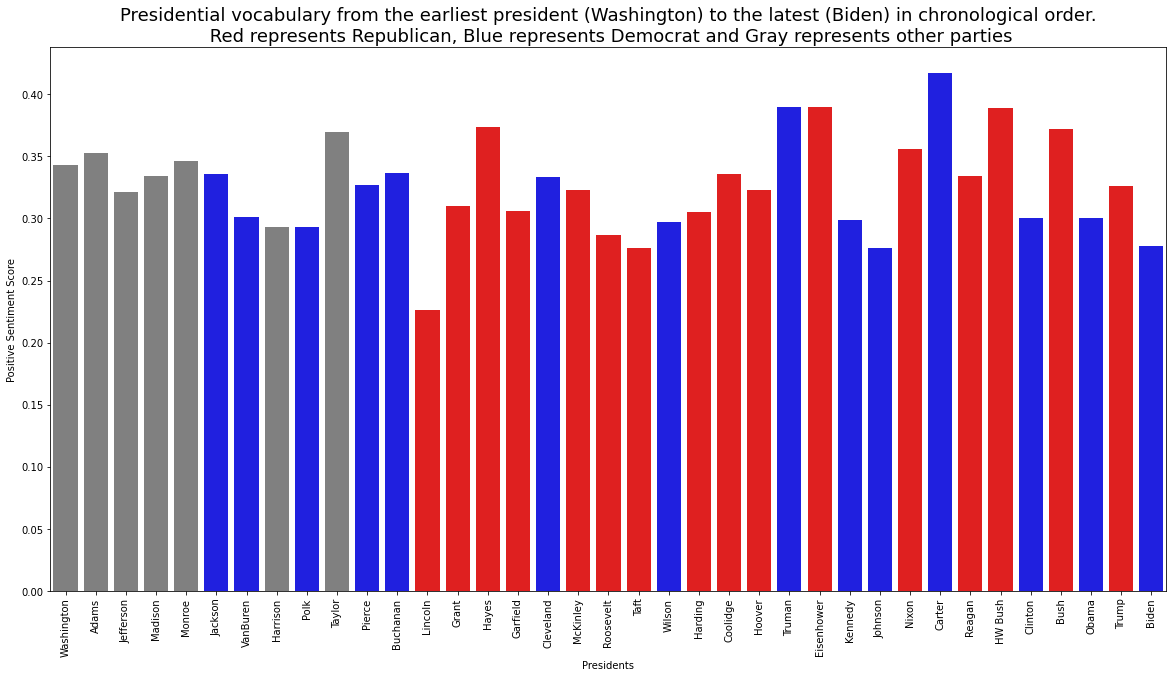

In [69]:
fig = plt.figure(figsize = (20, 10))

clrs = ['gray' if x in Other else 'blue' if x in Democrat else 'red' for x in order]

sns.barplot(x="President_Name", y="positive_sentiment_score", data=grouped_corpus, order=order, palette=clrs)
plt.xticks(rotation=90)
plt.rc('font', size=10)
plt.rc('axes', titlesize=18)
plt.xlabel("Presidents")
plt.ylabel("Positive Sentiment Score")
plt.title("Presidential vocabulary from the earliest president (Washington) to the latest (Biden) in chronological order.\n Red represents Republican, Blue represents Democrat and Gray represents other parties")
plt.show()

It is evident from the plot that president Carter has a high positive sentiment in his speech of score 0.4

In [62]:
# mean sentiment score of each political party group
grouped_corpus.groupby(['Political_Party'])['positive_sentiment_score'].mean().reset_index()

,Political_Party,positive_sentiment_score
0,Democrat,0.320286
1,Other,0.337143
2,Republican,0.327062


Presidents from the parties other than Democrat and Republican have a slight higher mean positive sentiment score. In fact, there has not been much difference in their mean sentiment scores.

In [63]:
def get_president_name(index):
    '''
    function to get the president name if index is passed to the grouped corpus
    Args:
        index (int): index of the grouped corpus
    Returns:
        president name (str)'''
    return grouped_corpus.iloc[int(index)]["President_Name"]

In [64]:
top_3_presidents = grouped_corpus.groupby(['Political_Party'])['positive_sentiment_score'].nlargest(3).reset_index()

In [65]:
top_3_presidents 

,Political_Party,level_1,positive_sentiment_score
0,Democrat,4,0.417
1,Democrat,32,0.390
2,Democrat,2,0.337
3,Other,31,0.370
4,Other,0,0.353
5,Other,23,0.346
6,Republican,8,0.390
7,Republican,11,0.389
8,Republican,14,0.374


In [66]:
top_3_presidents["President_Name"] = top_3_presidents["level_1"].apply(get_president_name)
top_3_presidents.drop("level_1", axis=1, inplace=True)

In [67]:
top_3_presidents

,Political_Party,positive_sentiment_score,President_Name
0,Democrat,0.417,Carter
1,Democrat,0.390,Truman
2,Democrat,0.337,Buchanan
3,Other,0.370,Taylor
4,Other,0.353,Adams
5,Other,0.346,Monroe
6,Republican,0.390,Eisenhower
7,Republican,0.389,HW Bush
8,Republican,0.374,Hayes


These are the top 3 presidents from each political parties having higher positive sentiment score.